In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Extract, transform and load data:

examine data, remove nan, extract data

In [2]:
df_netflix = pd.read_csv('netflix_titles.csv')


In [3]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df_netflix.dropna(subset = ['date_added'], axis = 0, inplace=True)

In [6]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      6173 non-null   object
 4   cast          7972 non-null   object
 5   country       7967 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.4+ KB


In [7]:
df_netflix['date_added'] = df_netflix['date_added'].astype('str')
# to retrieve month and year data, I change the data type to string for striping and spliting in the next stage

In [8]:
df_netflix['added_month'] = df_netflix['date_added'].apply(lambda x : x.strip().split(' ')[0])

In [9]:
df_netflix['added_year'] = df_netflix['date_added'].apply(lambda x : x.strip().split(', ')[-1])

In [10]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


In [11]:
df_netflix.drop(['show_id', 'date_added'], axis = 1, inplace= True)

In [12]:
df_netflix.duplicated().sum()

0

In [13]:
df_netflix['title'].duplicated().sum()

0

In [14]:
df_netflix.isnull().sum()

type               0
title              0
director        2624
cast             825
country          830
release_year       0
rating             4
duration           3
listed_in          0
description        0
added_month        0
added_year         0
dtype: int64

In [15]:
df_netflix.dropna(subset =['duration', 'rating'], inplace=True)

In [16]:
df_netflix.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_month,added_year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


EDA:

investidate data separately in different types - movie and TV show

In [17]:
df_movie = df_netflix[df_netflix['type'] =='Movie']
df_tv = df_netflix[df_netflix['type'] =='TV Show']

In [18]:
df_movie.shape

(6126, 12)

<AxesSubplot:xlabel='type', ylabel='count'>

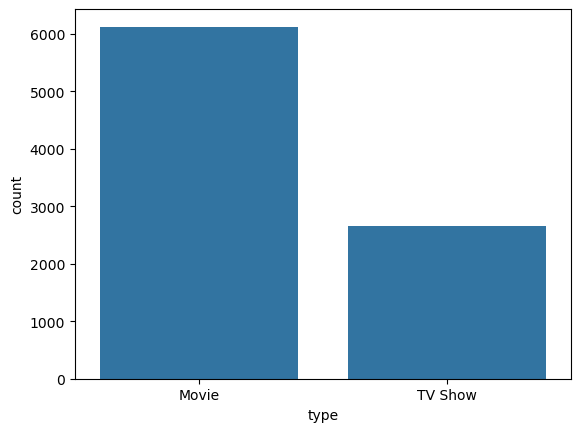

In [19]:
sns.countplot(df_netflix, x = 'type')

Number of movies are more than twice than that of TV shows

In [20]:
pivot_movie = pd.crosstab(columns = df_movie['added_year'], index = df_movie['added_month'])

In [21]:
pivot_movie

added_year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
added_month,,,,,,,,,,,,,,
April,0,0,0,0,0,0,1,1,14,65,87,119,127,135
August,0,0,0,0,0,0,1,2,22,77,130,87,82,117
December,0,0,0,0,1,2,5,14,52,80,124,168,101,0
February,0,0,0,0,1,0,1,3,9,65,63,103,72,65
January,1,0,0,0,0,0,2,1,15,57,105,116,152,96
July,0,0,0,0,0,0,1,5,19,45,125,98,103,169
June,0,0,0,0,0,0,1,4,11,65,50,122,115,124
March,0,0,0,0,0,0,0,3,14,86,138,119,93,75
May,0,1,0,1,0,0,0,5,9,63,70,91,105,94


In [22]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [23]:
pivot_movie = pivot_movie.reindex(month_list)
pivot_movie

added_year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
added_month,,,,,,,,,,,,,,
January,1,0,0,0,0,0,2,1,15,57,105,116,152,96
February,0,0,0,0,1,0,1,3,9,65,63,103,72,65
March,0,0,0,0,0,0,0,3,14,86,138,119,93,75
April,0,0,0,0,0,0,1,1,14,65,87,119,127,135
May,0,1,0,1,0,0,0,5,9,63,70,91,105,94
June,0,0,0,0,0,0,1,4,11,65,50,122,115,124
July,0,0,0,0,0,0,1,5,19,45,125,98,103,169
August,0,0,0,0,0,0,1,2,22,77,130,87,82,117
September,0,0,0,1,0,1,1,6,28,81,81,86,115,118


<AxesSubplot:xlabel='added_year', ylabel='added_month'>

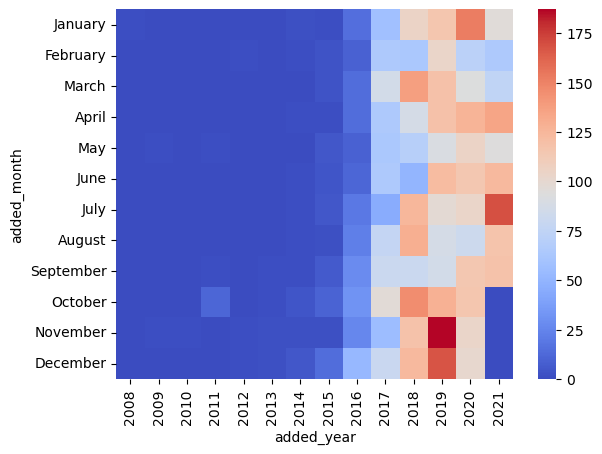

In [24]:
sns.heatmap(pivot_movie, cmap = 'coolwarm')

<AxesSubplot:xlabel='added_month'>

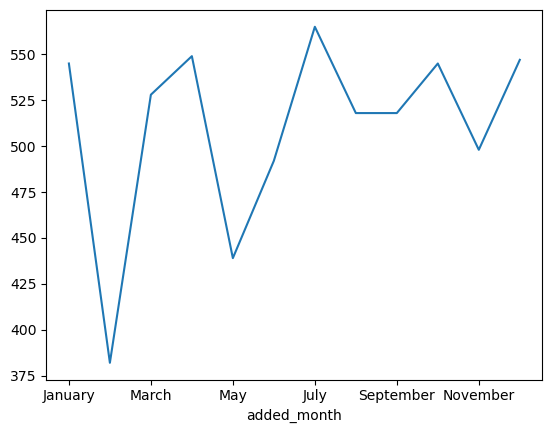

In [25]:
df_movie.groupby(['added_month']).size().reindex(month_list).plot(kind = 'line')

It's easy to tell from the heatmap that Netflix didn't have many new added movies until 2017. Meanwhile, Feburary and May have the lowest new added movie number, which means if there are new released movies, it's best to add them in these two months

In [26]:
country_count = {}

In [27]:
countries={}
df_movie['country']=df_movie['country'].fillna('Unknown')
cou=list(df_movie['country'])
#print (cou)
for i in cou:
    #print(i)
    i=list(i.split(','))
    #print(i)
    for j in i:
        j = j.strip()
         #print(j)
        if j in list(countries.keys()):
            countries[j]+=1
        else:
            countries[j]=1

C:\Users\hello\AppData\Local\Temp\ipykernel_8092\880238787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['country']=df_movie['country'].fillna('Unknown')


In [28]:
countries

{'United States': 2749,
 'Unknown': 439,
 'Ghana': 5,
 'Burkina Faso': 1,
 'United Kingdom': 534,
 'Germany': 182,
 'Ethiopia': 1,
 'Czech Republic': 16,
 'India': 962,
 'France': 303,
 'China': 114,
 'Canada': 319,
 'South Africa': 51,
 'Japan': 119,
 'Nigeria': 94,
 'Spain': 171,
 'Australia': 94,
 'Mexico': 111,
 'Italy': 74,
 'Romania': 14,
 'Argentina': 71,
 'Venezuela': 4,
 'Hong Kong': 100,
 'Nepal': 2,
 'New Zealand': 25,
 'Brazil': 66,
 'Greece': 9,
 'Colombia': 20,
 'Belgium': 78,
 'Switzerland': 18,
 'Bulgaria': 10,
 '': 6,
 'Algeria': 3,
 'Poland': 32,
 'Israel': 19,
 'Saudi Arabia': 9,
 'Thailand': 46,
 'Indonesia': 86,
 'Egypt': 102,
 'Denmark': 34,
 'Kuwait': 5,
 'Netherlands': 42,
 'Singapore': 18,
 'Malaysia': 18,
 'South Korea': 61,
 'Vietnam': 7,
 'Hungary': 10,
 'Lebanon': 24,
 'Syria': 2,
 'Philippines': 80,
 'United Arab Emirates': 36,
 'Sweden': 31,
 'Qatar': 10,
 'Mauritius': 1,
 'Austria': 11,
 'Turkey': 83,
 'Russia': 11,
 'Taiwan': 19,
 'Cameroon': 1,
 'Pales

In [29]:
country_count_df = pd.DataFrame.from_dict(countries,orient = 'index')

In [30]:
country_count_df = country_count_df.rename(columns={0: 'count'})
country_count_df

,count
United States,2749
Unknown,439
Ghana,5
Burkina Faso,1
United Kingdom,534
...,...
Sudan,1
Panama,1
Uganda,1
East Germany,1


<AxesSubplot:>

<Figure size 1400x600 with 0 Axes>

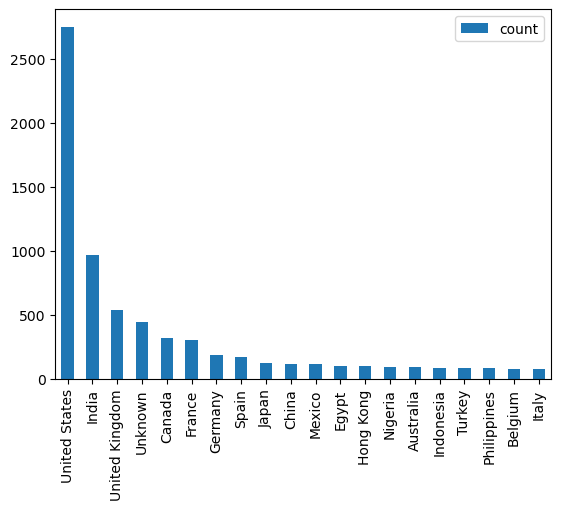

In [31]:
plt.figure(figsize = (14,6))
country_count_df.nlargest(20, 'count').plot(kind = 'bar')


US has leading number of added movies, followed by India and the UK. 

In [32]:
df_movie.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'added_month',
       'added_year'],
      dtype='object')

<AxesSubplot:xlabel='rating'>

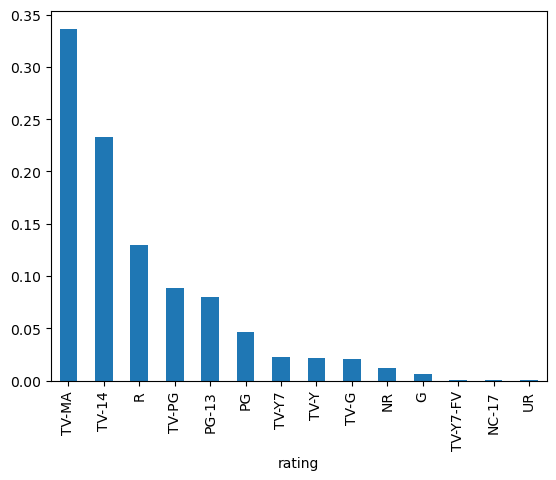

In [33]:
df_movie['rating'].value_counts(normalize=True).plot(kind = 'bar')

TV-MA Mature Audience Only has the most movies. This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17. Considering R rating has similar audience restriction, we can conclude most movies released in Netflix are for adults. In other words, main audience in Netflix is adult. 

In [34]:
df_movie['duration_min'] = df_movie['duration'].astype('str').apply(lambda x: x.replace(' min', ''))

C:\Users\hello\AppData\Local\Temp\ipykernel_8092\1922858427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_min'] = df_movie['duration'].astype('str').apply(lambda x: x.replace(' min', ''))


In [35]:
df_movie['duration_min']=df_movie['duration_min'].astype('int')

C:\Users\hello\AppData\Local\Temp\ipykernel_8092\3900657690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_min']=df_movie['duration_min'].astype('int')


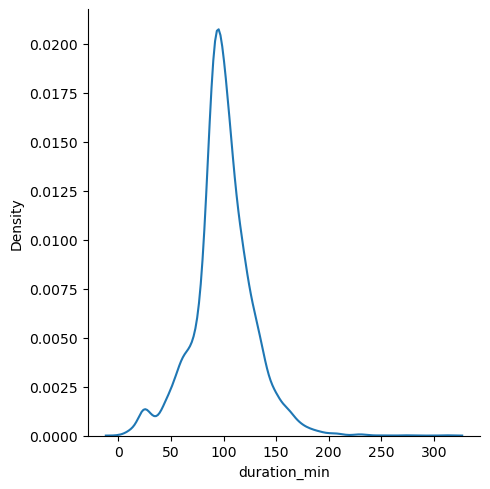

In [36]:
sns.displot(df_movie, x = 'duration_min', kind = 'kde')

Most movies' duration are between 90 to 120 min

In [114]:
df_movie['director'].value_counts(dropna = False)

director
NaN                           187
Rajiv Chilaka                  19
Raúl Campos, Jan Suter         18
Suhas Kadav                    16
Marcus Raboy                   15
                             ... 
Sion Sono                       1
Dennis Rovira van Boekholt      1
Naoto Amazutsumi                1
Jenny Gage                      1
Mozez Singh                     1
Name: count, Length: 4353, dtype: int64

In [115]:
df_movie.dropna(subset='director', inplace = True)

C:\Users\hello\AppData\Local\Temp\ipykernel_8092\1207934186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie.dropna(subset='director', inplace = True)


In [116]:
director_m = {}
for d in list(df_movie['director'].astype('str')):
    d = d.split(',')
    for i in d:
        i = i.strip()
        director_m[i] = director_m.get(i,0) +1

In [117]:
director_m

{'Kirsten Johnson': 1,
 'Robert Cullen': 1,
 'José Luis Ucha': 1,
 'Haile Gerima': 1,
 'Theodore Melfi': 1,
 'Christian Schwochow': 1,
 'Bruno Garotti': 4,
 'Pedro de Echave García': 1,
 'Pablo Azorín Williams': 1,
 'Adam Salky': 1,
 'K.S. Ravikumar': 1,
 'Alex Woo': 5,
 'Stanley Moore': 5,
 'S. Shankar': 1,
 'Rajiv Menon': 3,
 'Dennis Dugan': 4,
 'Scott Stewart': 3,
 'Robert Luketic': 6,
 'Ashwiny Iyer Tiwari': 2,
 'Abhishek Chaubey': 4,
 'Saket Chaudhary': 2,
 'Daniel Sandu': 1,
 'Cédric Jimenez': 1,
 'George Nolfi': 1,
 'Steven Spielberg': 11,
 'Jeannot Szwarc': 1,
 'Joe Alves': 1,
 'Joseph Sargent': 2,
 'Tyler Greco': 1,
 'Daniel Espinosa': 1,
 'Antoine Fuqua': 4,
 'Toshiya Shinohara': 7,
 'Masahiko Murata': 5,
 'Hajime Kamegaki': 2,
 'Hirotsugu Kawasaki': 1,
 'Toshiyuki Tsuru': 1,
 'Tensai Okamura': 1,
 'David Yarovesky': 1,
 'Hanns-Bruno Kammertöns': 1,
 'Vanessa Nöcker': 1,
 'Michael Wech': 1,
 'David A. Vargas': 1,
 'Kemi Adetiba': 2,
 'Ben Simms': 2,
 'Prakash Satam': 7,
 'Del

In [120]:
director_m_df = pd.DataFrame.from_dict(director_m, orient = 'index')
director_m_df

,0
Kirsten Johnson,1
Robert Cullen,1
José Luis Ucha,1
Haile Gerima,1
Theodore Melfi,1
...,...
Mu Chu,1
Chandra Prakash Dwivedi,1
Majid Al Ansari,1
Peter Hewitt,1


In [122]:
director_m_df = director_m_df.rename(columns = {0:'count'})
director_m_df.nlargest(10,'count')

,count
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Jay Karas,15
Marcus Raboy,15
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12
Jay Chapman,12


Rajiv Chilaka directed most movies (22) in Netflix. He is the director and producer of many Indian children movies. 

In [37]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2664 entries, 1 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          2664 non-null   object
 1   title         2664 non-null   object
 2   director      230 non-null    object
 3   cast          2314 non-null   object
 4   country       2274 non-null   object
 5   release_year  2664 non-null   int64 
 6   rating        2664 non-null   object
 7   duration      2664 non-null   object
 8   listed_in     2664 non-null   object
 9   description   2664 non-null   object
 10  added_month   2664 non-null   object
 11  added_year    2664 non-null   object
dtypes: int64(1), object(11)
memory usage: 270.6+ KB


In [38]:
pivot_tv = df_tv.groupby(['added_month','added_year']).size().unstack()

In [39]:
pivot_tv = pivot_tv.reindex(month_list)
pivot_tv

added_year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
added_month,,,,,,,,,,
January,NaN,NaN,NaN,NaN,28.0,14.0,24.0,37.0,53.0,36.0
February,1.0,NaN,1.0,1.0,6.0,17.0,23.0,45.0,42.0,44.0
March,NaN,1.0,NaN,2.0,3.0,38.0,35.0,53.0,44.0,37.0
April,NaN,NaN,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0
May,NaN,NaN,NaN,1.0,4.0,23.0,27.0,48.0,52.0,38.0
June,NaN,NaN,NaN,2.0,7.0,29.0,28.0,46.0,41.0,83.0
July,NaN,NaN,NaN,2.0,9.0,34.0,27.0,59.0,43.0,88.0
August,NaN,1.0,NaN,NaN,11.0,38.0,34.0,44.0,47.0,61.0
September,NaN,1.0,NaN,1.0,19.0,32.0,43.0,37.0,53.0,65.0


<AxesSubplot:xlabel='added_year', ylabel='added_month'>

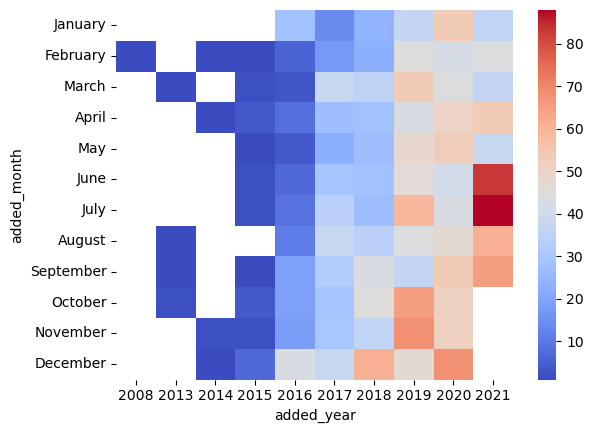

In [40]:
sns.heatmap(pivot_tv, cmap = 'coolwarm')

TV shows also started to increase since 2017

<AxesSubplot:xlabel='added_month'>

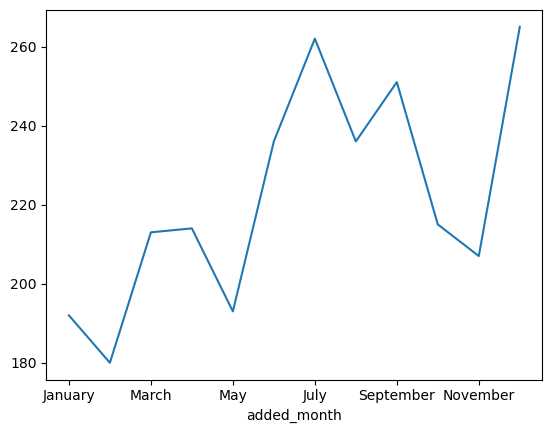

In [41]:
df_tv.groupby('added_month').size().reindex(month_list).plot(kind = 'line')

Similar as movies, Netflix has low increase of TV shows in Feb and May

<AxesSubplot:xlabel='rating'>

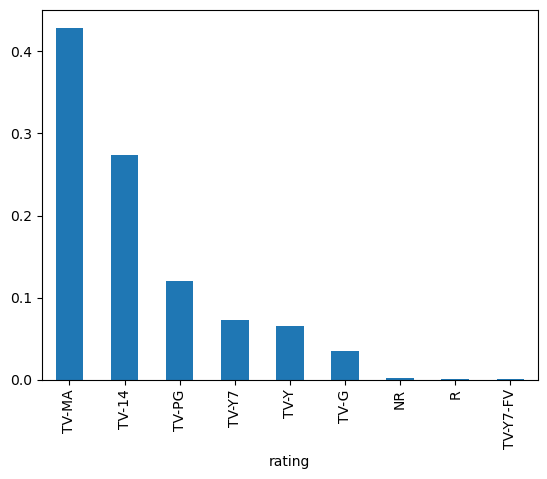

In [42]:
df_tv['rating'].value_counts(normalize=True).plot(kind = 'bar')

TV-PG is Parental guidance suggest. It might contains materials that aren't suitable for children. Interestingly, although TV-MA still has the highest percentage, the following several ratings are for younger audience. 

In [43]:
country_count_TV = {}
for i in list(df_tv['country'].astype('str')):
    i = i.split(',')
    for j in i:
        j = j.strip()
        country_count_TV[j] = country_count_TV.get(j,0)+1

In [44]:
country_count_TV

{'South Africa': 11,
 'nan': 390,
 'India': 84,
 'United Kingdom': 271,
 'United States': 932,
 'Mexico': 58,
 'Turkey': 30,
 'Australia': 64,
 'Finland': 4,
 'Nigeria': 9,
 'Japan': 197,
 'Belgium': 12,
 'France': 90,
 'South Korea': 170,
 'Spain': 61,
 'Singapore': 23,
 'Russia': 16,
 '': 1,
 'Ireland': 14,
 'Italy': 25,
 'Argentina': 20,
 'Jordan': 2,
 'Colombia': 32,
 'Israel': 11,
 'Taiwan': 70,
 'Germany': 44,
 'Canada': 126,
 'Poland': 9,
 'Thailand': 24,
 'New Zealand': 8,
 'Netherlands': 8,
 'Sweden': 11,
 'China': 48,
 'Iceland': 3,
 'Denmark': 14,
 'Philippines': 3,
 'Indonesia': 4,
 'United Arab Emirates': 1,
 'Norway': 9,
 'Czech Republic': 6,
 'Lebanon': 7,
 'Brazil': 31,
 'Uruguay': 1,
 'Egypt': 15,
 'Luxembourg': 2,
 'Senegal': 1,
 'Saudi Arabia': 4,
 'Kuwait': 3,
 'Belarus': 1,
 'Chile': 5,
 'Malta': 1,
 'Puerto Rico': 1,
 'Austria': 1,
 'Cyprus': 1,
 'Malaysia': 8,
 'Mauritius': 1,
 'Hong Kong': 5,
 'Croatia': 1,
 'West Germany': 2,
 'Syria': 1,
 'Hungary': 1,
 'Cuba'

In [45]:
country_tv_df = pd.DataFrame.from_dict(country_count_TV, orient = 'index')
country_tv_df

,0
South Africa,11
nan,390
India,84
United Kingdom,271
United States,932
...,...
Greece,2
Pakistan,4
Azerbaijan,1
Ukraine,2


In [46]:
country_tv_df=country_tv_df.rename(columns={0:'count'})
country_tv_df

,count
South Africa,11
nan,390
India,84
United Kingdom,271
United States,932
...,...
Greece,2
Pakistan,4
Azerbaijan,1
Ukraine,2


<AxesSubplot:>

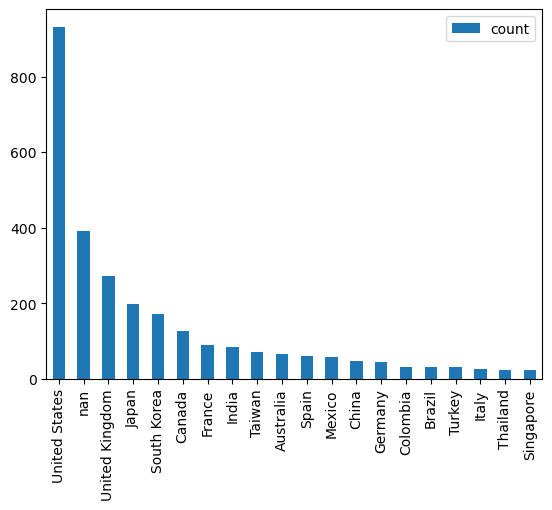

In [47]:
country_tv_df.nlargest(20, 'count').plot(kind = 'bar')

Despite missing values, unsprisingly US has most TV shows, followed by the UK, which also ranked the 3rd in movie numbers. 

In [48]:
df_tv['duration'].value_counts()

duration
1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: count, dtype: int64

In [49]:
df_tv['duration'] = df_tv['duration'].str.replace(' Season', '')
df_tv['duration'] = df_tv['duration'].str.replace('s', '')

C:\Users\hello\AppData\Local\Temp\ipykernel_8092\3027522969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration'] = df_tv['duration'].str.replace(' Season', '')
C:\Users\hello\AppData\Local\Temp\ipykernel_8092\3027522969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration'] = df_tv['duration'].str.replace('s', '')


In [50]:
df_tv['duration'].value_counts(normalize=True)

duration
1     0.672297
2     0.158033
3     0.074324
4     0.035285
5     0.024024
6     0.012387
7     0.008634
8     0.006381
9     0.003378
10    0.002252
13    0.000751
15    0.000751
12    0.000751
17    0.000375
11    0.000375
Name: proportion, dtype: float64

More than 80% of TV shows have no more than 2 seasons.

In [51]:
df_tv = df_tv.rename(columns={'duration': 'duration_season'})

In [52]:
df_tv['duration_season']=df_tv['duration_season'].astype('int')

<AxesSubplot:xlabel='title'>

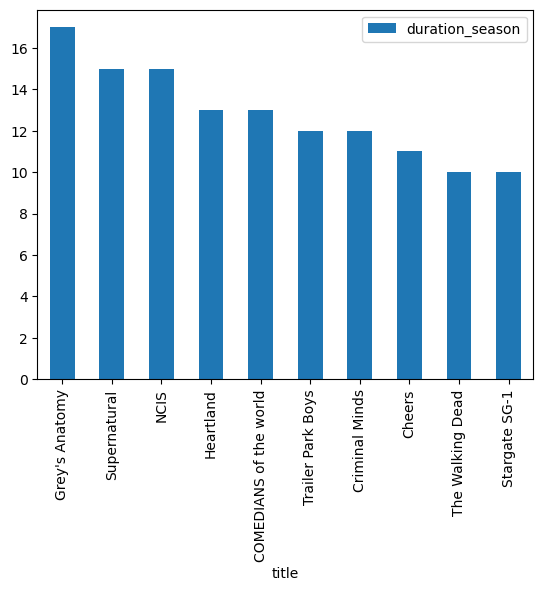

In [53]:
df_tv.nlargest(10, 'duration_season').plot(kind = 'bar', x = 'title', y = 'duration_season')

The TV show with longest seasons (17) is called Grey's Anatomy.

In [72]:
df_tv['cast'].value_counts()

cast
David Attenborough                                                                                                                                                                                                                                                   14
Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson                                                                                                                                                                                             4
Dave Chappelle                                                                                                                                                                                                                                                        3
Nadiya Hussain                                                                                                                                                                                             

In [108]:
df_tv.dropna(subset='cast', inplace=True)

In [109]:
cast_d = {}
for c in list(df_tv['cast'].astype('str')):
    c = c.split(',')
    for i in c:
        i = i.strip()
        cast_d[i] = cast_d.get(i,0)+1

In [110]:
cast_df = pd.DataFrame.from_dict(cast_d, orient='index')
cast_df

,0
Ama Qamata,1
Khosi Ngema,1
Gail Mabalane,1
Thabang Molaba,2
Dillon Windvogel,1
...,...
Sheheryar Munawar,1
Samina Peerzada,1
Waseem Abbas,1
Javed Sheikh,1


In [111]:
cast_df=cast_df.rename(columns={0:'count'})

In [112]:
cast_df.nlargest(10, 'count')

,count
Takahiro Sakurai,25
Yuki Kaji,19
Junichi Suwabe,17
Daisuke Ono,17
Yuichi Nakamura,16
Ai Kayano,16
Jun Fukuyama,15
Yoshimasa Hosoya,15
David Attenborough,14
Yoshitsugu Matsuoka,13


Takahiro Sakurai shows up in 25 TV shows, who is a Japanese voice actor and narrator. 